In [1]:
import os

# ==============================================================================
# Must set R path BEFORE importing rpy2!
# ==============================================================================
# Your Conda R environment path (please ensure this path is correct)
conda_env_path = "/home/hice1/kyan66/scratch/r_kernel"

# 1. Set R_HOME (tell Python where R's home directory is)
os.environ['R_HOME'] = f"{conda_env_path}/lib/R"

# 2. Set PATH (tell Python where R's executable commands are)
os.environ['PATH'] = f"{conda_env_path}/bin:" + os.environ.get('PATH', '')

# 3. Set LD_LIBRARY_PATH (tell Python where R's dynamic libraries are)
os.environ['LD_LIBRARY_PATH'] = f"{conda_env_path}/lib:" + os.environ.get('LD_LIBRARY_PATH', '')

print(f"✅ R environment path configured: {os.environ['R_HOME']}")

✅ R environment path configured: /home/hice1/kyan66/scratch/r_kernel/lib/R


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import random

In [3]:
save_dir = '../data/ssusa'
os.makedirs(save_dir, exist_ok=True)

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [4]:
# Load cleaned Snapshot USA data with IUCN species names
data_dir = save_dir
df_path = data_dir + '/cleaned_snapshot_usa_iucn.csv'


In [5]:
df = pd.read_csv(df_path)

/tmp/ipykernel_2131338/2810494364.py:1: DtypeWarning: Columns (0: Sequence_ID) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path)


In [6]:
df.head(10)

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,Genus,Species,Common_Name,Sci_Name,Age,Sex,Group_Size,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,adult,female,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,juvenile,unknown,2,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
5,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s5,2019-09-02 19:18:00,2019-09-02 19:18:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
6,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s6,2019-09-02 19:57:00,2019-09-02 19:57:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
7,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s7,2019-09-02 21:44:00,2019-09-02 21:44:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
8,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s8,2019-09-02 23:44:00,2019-09-02 23:44:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
9,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s9,2019-09-03 06:55:00,2019-09-03 06:55:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source


In [7]:
def get_species_matrix(df, unit_col, species_col='Sci_Name'):
    """
    Converts dataframe to a presence/absence matrix (Sampling Unit x Species).
    
    Parameters:
    - df: pandas DataFrame containing the data
    - unit_col: column name for sampling unit (can be Site, Year, Location, Year_Month, etc.)
    - species_col: column name for species identification (default: 'Sci_Name')
    
    Returns:
    - Binary matrix where rows are sampling units and columns are species (1=present, 0=absent)
    """
    # Filter valid species and sampling units
    valid_data = df.dropna(subset=[species_col, unit_col])
    valid_data = valid_data[valid_data[species_col] != ""]

    # Create pivot table (Count occurrences)
    matrix = pd.crosstab(valid_data[unit_col], valid_data[species_col])

    # Convert to binary Presence/Absence (1/0)
    matrix = (matrix > 0).astype(int)

    return matrix

In [8]:
def species_accumulation(matrix, method='exact', permutations=100, 
                         conditioned=True, gamma='jack1', w=None):
    """
    Uses R's vegan::specaccum function for species accumulation.
    
    Parameters:
    - matrix: binary pandas DataFrame (Rows=Samples, Cols=Species)
    - method: Species accumulation method (partial match supported):
        * 'collector' - adds sites in the order they appear in the data
        * 'random' - adds sites in random order (uses permutations)
        * 'exact' - expected (mean) species richness using sample-based rarefaction (Mao Tau)
        * 'coleman' - expected richness following Coleman et al. 1982
        * 'rarefaction' - mean when accumulating individuals instead of sites
    - permutations: number of permutations for method='random' (default: 100)
    - conditioned: if True (default), SD for 'exact' method is conditional on empirical data
    - gamma: method for estimating total extrapolated species ('jack1', 'jack2', 'chao', 'boot')
             used for unconditional SD estimation in 'exact' method
    - w: optional weights giving sampling effort for each site (for 'random' and 'collector')

    Returns:
    - dict containing:
        * 'sites': number of sites (x-axis)
        * 'richness': species richness at each site count (y-axis)
        * 'sd': standard deviation (None for 'collector' method)
        * 'method': the method used
        * 'perm': permutation matrix (only for 'random' method, else None)
        * 'individuals': average individuals per site (only for 'rarefaction', else None)
        * 'effort': accumulated effort (only when weights used, else None)
    """
    
    # Load vegan package
    vegan = importr('vegan')
    
    # Convert pandas DataFrame to R data frame
    with localconverter(pandas2ri.converter + robjects.default_converter):
        r_matrix = pandas2ri.py2rpy(matrix)
        
        # Build keyword arguments
        kwargs = {
            'method': method,
            'permutations': permutations,
            'conditioned': conditioned,
            'gamma': gamma
        }
        
        # Add weights if provided
        if w is not None:
            kwargs['w'] = robjects.FloatVector(w)
        
        # Call vegan::specaccum
        result = vegan.specaccum(r_matrix, **kwargs)
    
    # Extract results from R object
    with localconverter(pandas2ri.converter + robjects.default_converter):
        sites = np.array(robjects.r('as.numeric')(result.rx2('sites')))
        richness = np.array(robjects.r('as.numeric')(result.rx2('richness')))
        
        # SD is NULL for 'collector' method
        try:
            sd_val = result.rx2('sd')
            if sd_val != robjects.NULL:
                sd = np.array(robjects.r('as.numeric')(sd_val))
            else:
                sd = np.zeros_like(richness)
        except:
            sd = np.zeros_like(richness)
        
        # Extract permutation matrix for 'random' method
        try:
            perm_val = result.rx2('perm')
            if perm_val != robjects.NULL:
                perm = np.array(perm_val)
            else:
                perm = None
        except:
            perm = None
        
        # Extract individuals for 'rarefaction' method
        try:
            ind_val = result.rx2('individuals')
            if ind_val != robjects.NULL:
                individuals = np.array(robjects.r('as.numeric')(ind_val))
            else:
                individuals = None
        except:
            individuals = None
        
        # Extract effort when weights are used
        try:
            eff_val = result.rx2('effort')
            if eff_val != robjects.NULL:
                effort = np.array(robjects.r('as.numeric')(eff_val))
            else:
                effort = None
        except:
            effort = None
    
    return {
        'sites': sites,
        'richness': richness,
        'sd': sd,
        'method': method,
        'perm': perm,
        'individuals': individuals,
        'effort': effort
    }


In [9]:
def plot_sac(sac_data, title, xlabel="Sampling units"):
    """Publication-quality plotting function for species accumulation curves"""
    x = sac_data['sites']
    y = sac_data['richness']
    sd = sac_data['sd']

    # Create figure with higher DPI for publication quality
    _, ax = plt.subplots(figsize=(10, 7), dpi=300)
    
    # Set style for publication
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Plot Confidence Interval (Mean +/- 2 SD approx 95% CI)
    if sd is not None and np.any(sd > 0):
        ax.fill_between(x, y - 2*sd, y + 2*sd, 
                        color='#2E86AB', alpha=0.2, 
                        label='95% Confidence Interval',
                        edgecolor='#2E86AB', linewidth=0.5)
    
    # Plot Mean Line with markers
    ax.plot(x, y, color='#A23B72', linewidth=2.5, 
            marker='o', markersize=6, markerfacecolor='white',
            markeredgewidth=2, markeredgecolor='#A23B72',
            label='Species Richness', zorder=3)
    
    # Enhance grid
    ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Labels and title with better formatting
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel("Accumulated Species Richness", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Improve tick labels
    ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)
    
    # Add legend with better formatting
    ax.legend(loc='lower right', frameon=True, fancybox=True, 
             shadow=True, fontsize=11, framealpha=0.95)
    
    # Set spine width
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()


In [10]:
# ----------------------------
# Temporal Data Preparation: Filter arrays with complete 5-year sampling
# ----------------------------
# Clean Year column
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Identify arrays with complete 5 years of data
years_per_array = df[df['Camera_Trap_Array'].notna()].groupby('Camera_Trap_Array')['Year'].unique()
arrays_5_years = years_per_array[years_per_array.apply(len) == 5].index.tolist()

print(f"Found {len(arrays_5_years)} arrays with 5 years of data.")

# Filter to only include arrays with complete temporal coverage
df_arrays_5_years = df[df['Camera_Trap_Array'].isin(arrays_5_years)].copy()

# Extract month from End_Date for temporal analysis
df_arrays_5_years['End_Date'] = pd.to_datetime(df_arrays_5_years['End_Date'])
df_arrays_5_years['Month'] = df_arrays_5_years['End_Date'].dt.strftime('%m')

print(df_arrays_5_years[['Camera_Trap_Array', 'Year', 'Month']].head())


Found 41 arrays with 5 years of data.
  Camera_Trap_Array  Year Month
0             Crupi  2019    11
1             Crupi  2019    11
2             Crupi  2019    11
3             Crupi  2019    11
4             Crupi  2019    11


Selected Camera_Trap_Array: Herrera
Matrix shape: (5, 17)


R callback write-console: 'nperm' >= set of all permutations: complete enumeration.
  
R callback write-console: Set of permutations < 'minperm'. Generating entire set.
  


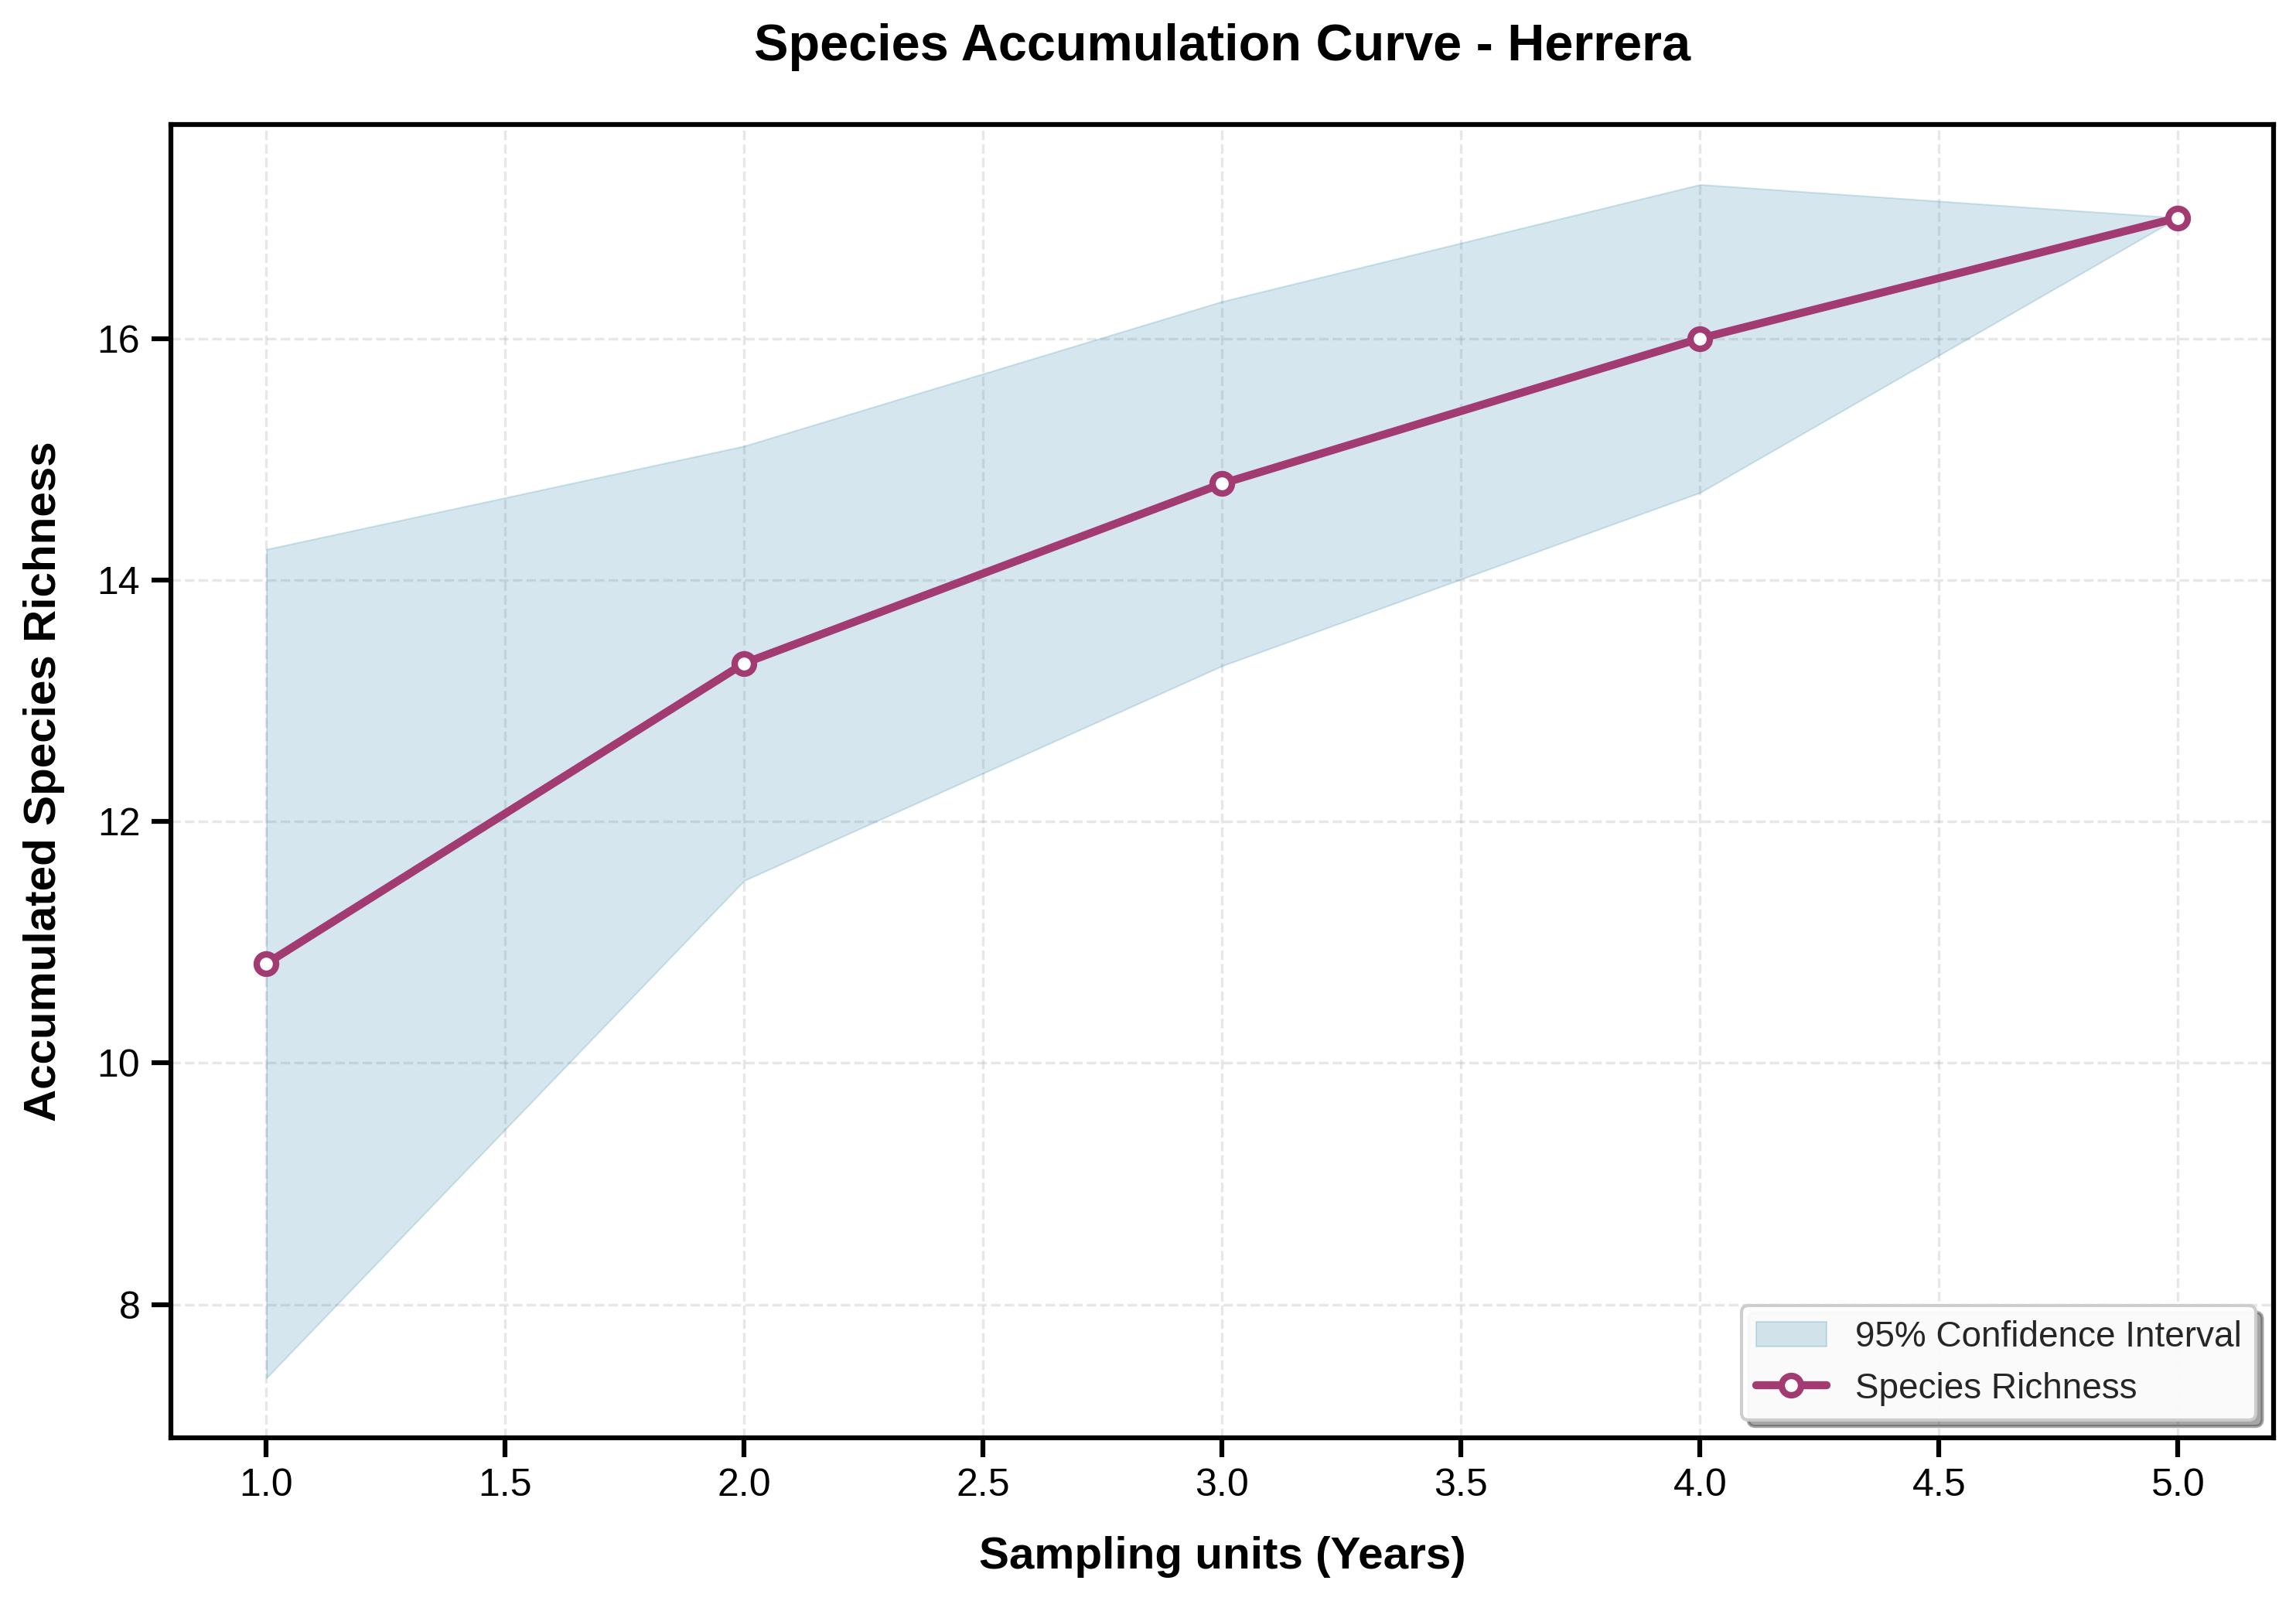

Observed richness: 17.0


In [11]:
# ----------------------------
# Temporal Species Accumulation Analysis
# ----------------------------
# Select array with most records (or manually override)
selected_array = df_arrays_5_years['Camera_Trap_Array'].value_counts().idxmax()
# selected_array = "Herrera"  # Manual override if needed

print(f"Selected Camera_Trap_Array: {selected_array}")

# Subset data to selected array
df_array = df_arrays_5_years[df_arrays_5_years['Camera_Trap_Array'] == selected_array]

# Create presence/absence matrix: rows = Years, columns = Species
mat_year = get_species_matrix(df_array, unit_col='Year', species_col='Sci_Name')

# Sort by year index for chronological collector curve
mat_year = mat_year.sort_index()

print(f"Matrix shape: {mat_year.shape}")

# Calculate randomized species accumulation curve (method='random')
# This represents expected richness when sampling years in random order
acc_rand_year = species_accumulation(mat_year, method='random', permutations=1000)

# Plot randomized accumulation curve
plot_sac(acc_rand_year,
         title=f"Species Accumulation Curve - {selected_array}",
         xlabel="Sampling units (Years)")

print(f"Observed richness: {acc_rand_year['richness'][-1]}")


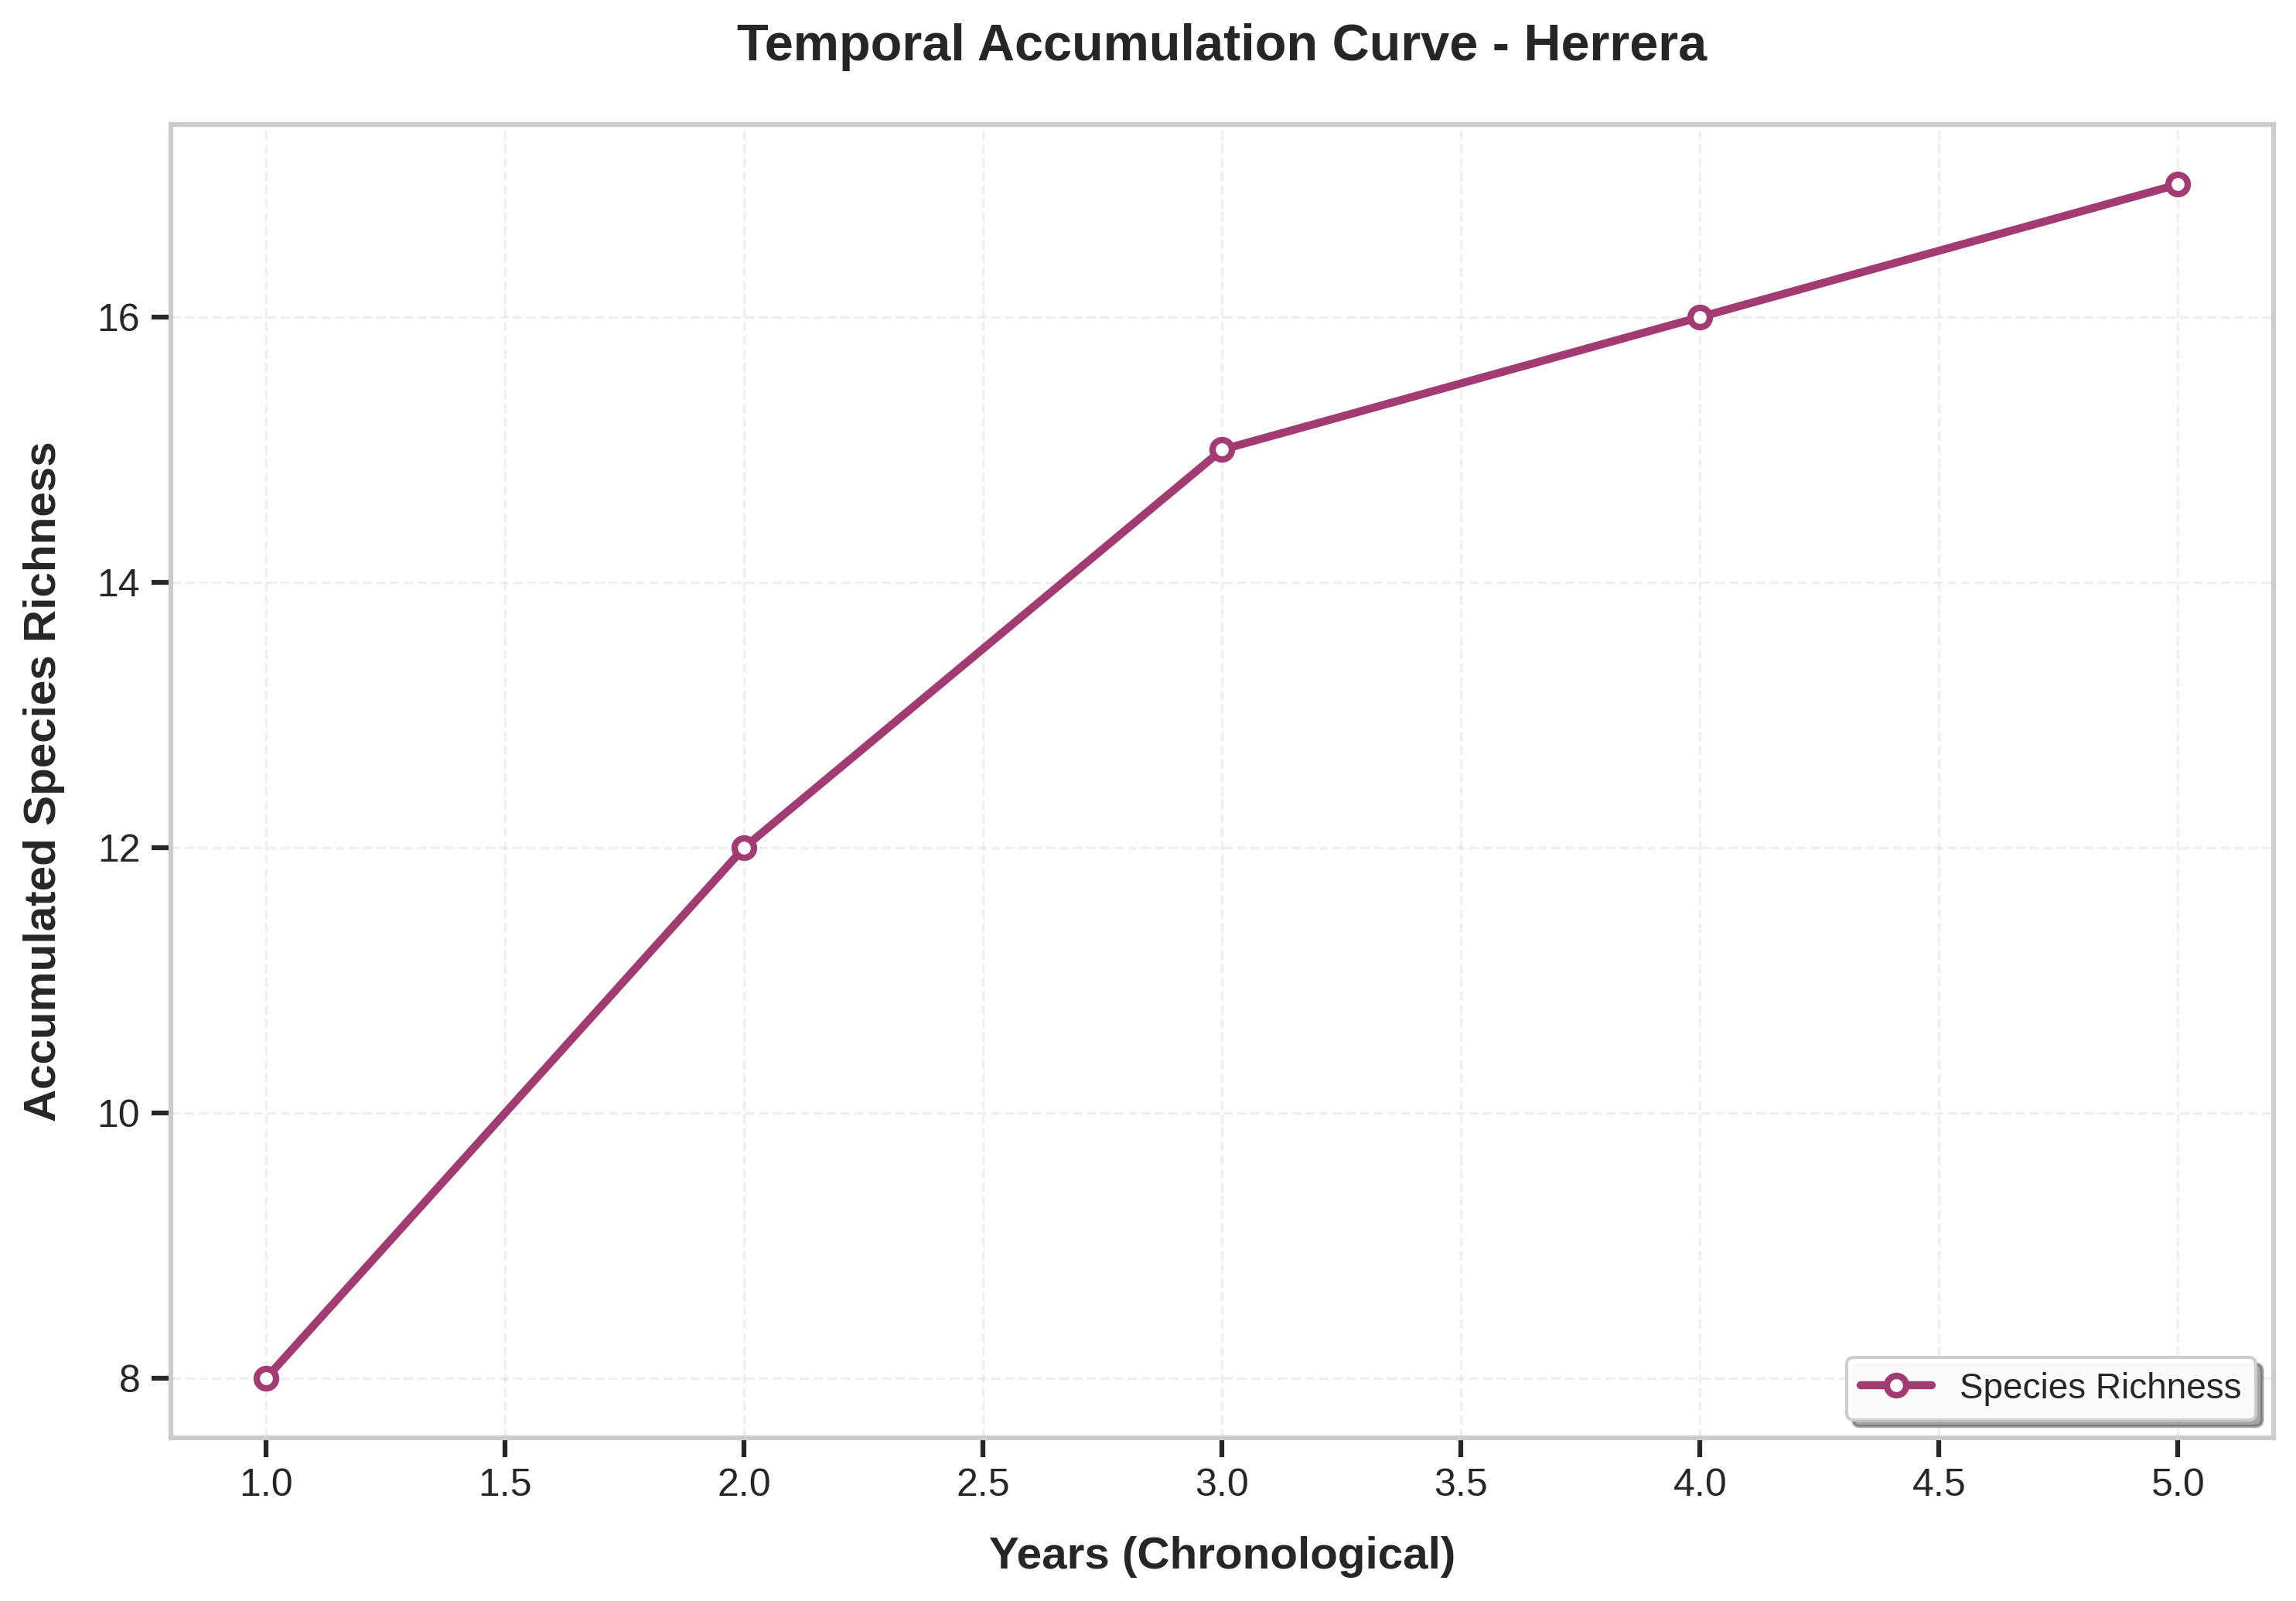

In [12]:
# ----------------------------
# Chronological Species Accumulation (Collector Curve)
# ----------------------------
# Calculate collector accumulation curve (method='collector')
# This shows actual species discovery in chronological order of years
acc_col_year = species_accumulation(mat_year, method='collector')

# Plot chronological accumulation curve
plot_sac(acc_col_year,
         title=f"Temporal Accumulation Curve - {selected_array}",
         xlabel="Years (Chronological)")


# Spatial biodiversity analysis (Snapshot USA arrays vs IUCN ranges)
This section builds array buffers, intersects with IUCN polygons, and generates spatial species accumulation curves.

In [13]:
import geopandas as gpd
import re

# ----------------------------
# Config
# ----------------------------
buffer_km = 5.0  # Based on Snapshot USA protocol: max distance defining an array
iucn_path = "../data/MAMMALS_TERRESTRIAL_ONLY/MAMMALS_TERRESTRIAL_ONLY.shp"

# ----------------------------
# Helpers
# ----------------------------
def _pick_column(columns, candidates):
    lower_map = {c.lower(): c for c in columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    return None

def _normalize_species(value):
    if value is None or (isinstance(value, float) and pd.isna(value)):
        return None
    text = str(value).strip()
    text = re.sub(r"\s+", " ", text).lower()
    return text


In [14]:
# ----------------------------
# Load IUCN species range data
# ----------------------------
# Read IUCN shapefile and ensure proper CRS (WGS84)
iucn = gpd.read_file(iucn_path)
if iucn.crs is None:
    iucn = iucn.set_crs("EPSG:4326")
else:
    iucn = iucn.to_crs("EPSG:4326")

# Clean geometries: remove null and fix invalid polygons
iucn = iucn[iucn.geometry.notnull()].copy()
if not iucn.is_valid.all():
    iucn["geometry"] = iucn.geometry.buffer(0)  # Fix invalid geometries


In [15]:
iucn.head(1)

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,source,island,tax_comm,dist_comm,generalisd,legend,kingdom,phylum,class,order_,family,genus,category,marine,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,geometry
0,18,Abrocoma boliviensis,1,1,1,IUCN SSC Small Mammal Specialist Group,2016,IUCN SSC Small Mammal Specialist Group,NaN,NaN,NaN,NaN,NaN,NaN,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,RODENTIA,ABROCOMIDAE,Abrocoma,CR,false,true,false,0.30515,0.00552,"POLYGON ((-64.46864 -17.88625, -64.45733 -17.89669, -64.45733 -17.90799, -64.47212 -17.92539, -64.50083 -17.93061, -64.56172 -17.928, -64.57738 -17.91669, -64.58347 -17.89408, -64.57564 -17.8819, -64.53823 -17.87581, -64.46864 -17.88625))"


In [16]:
# ----------------------------
# Align species naming between IUCN and Snapshot USA datasets
# ----------------------------
# Auto-detect IUCN species column
iucn_species_col = _pick_column(
    iucn.columns,
    ["SCI_NAME", "Sci_Name", "binomial", "scientific", "species", "Species"],
)
if iucn_species_col is None:
    raise ValueError("Could not detect IUCN species name column.")

# Normalize IUCN species names (lowercase, trimmed)
iucn["Sci_Name"] = iucn[iucn_species_col].map(_normalize_species)
iucn = iucn.dropna(subset=["Sci_Name"])
iucn = iucn[["Sci_Name", "geometry"]]

# Auto-detect Snapshot USA species column
df_species_col = _pick_column(
    df.columns,
    ["Sci_Name", "SciName", "Scientific_Name", "species", "Species"],
)
if df_species_col is None:
    raise ValueError("Could not detect Snapshot USA species column.")
if df_species_col != "Sci_Name":
    df["Sci_Name"] = df[df_species_col]

# Normalize Snapshot USA species names to match IUCN format
df["Sci_Name"] = df["Sci_Name"].map(_normalize_species)

print(f"IUCN species column: {iucn_species_col}")
print(f"Snapshot USA species column: {df_species_col}")
print(f"IUCN CRS: {iucn.crs}")
print(iucn["Sci_Name"].head())


IUCN species column: sci_name
Snapshot USA species column: Sci_Name
IUCN CRS: EPSG:4326
0    abrocoma boliviensis
1     acerodon celebensis
2     acerodon celebensis
3     acerodon celebensis
4     acerodon celebensis
Name: Sci_Name, dtype: str


In [17]:
# ----------------------------
# Create array buffers from camera trap coordinates
# ----------------------------
# Auto-detect coordinate and array columns
lat_col = _pick_column(df.columns, ["Latitude", "Lat", "GPS_Latitude", "Site_Latitude"])
lon_col = _pick_column(df.columns, ["Longitude", "Lon", "GPS_Longitude", "Site_Longitude"])
array_col = _pick_column(df.columns, ["Camera_Trap_Array", "Array", "Array_ID", "array"])

if lat_col is None or lon_col is None or array_col is None:
    raise ValueError("Missing required columns for lat/lon/array.")

# Clean coordinate data
df_points = df.dropna(subset=[lat_col, lon_col, array_col]).copy()
df_points[lat_col] = pd.to_numeric(df_points[lat_col], errors="coerce")
df_points[lon_col] = pd.to_numeric(df_points[lon_col], errors="coerce")
df_points = df_points.dropna(subset=[lat_col, lon_col])

# Validate coordinate ranges
in_range = df_points[lat_col].between(-90, 90) & df_points[lon_col].between(-180, 180)
df_points = df_points[in_range].copy()

# Auto-detect and fix swapped lat/lon columns (common data issue)
if df_points.empty:
    df_swap = df.dropna(subset=[lat_col, lon_col, array_col]).copy()
    df_swap[lat_col] = pd.to_numeric(df_swap[lat_col], errors="coerce")
    df_swap[lon_col] = pd.to_numeric(df_swap[lon_col], errors="coerce")
    df_swap = df_swap.dropna(subset=[lat_col, lon_col])
    swapped_ok = df_swap[lon_col].between(-90, 90) & df_swap[lat_col].between(-180, 180)
    df_swap = df_swap[swapped_ok].copy()
    if not df_swap.empty:
        df_points = df_swap.rename(columns={lat_col: "_lon", lon_col: "_lat"})
        df_points[lat_col] = df_points["_lat"]
        df_points[lon_col] = df_points["_lon"]
        df_points = df_points.drop(columns=["_lat", "_lon"])
        print("⚠️ Swapped lat/lon based on value ranges.")

if df_points.empty:
    raise ValueError("No valid coordinates after cleaning. Check lat/lon columns.")

df_points["point_id"] = df_points.index.astype(str)

# Create GeoDataFrame from camera trap points (WGS84)
gdf_points = gpd.GeoDataFrame(
    df_points,
    geometry=gpd.points_from_xy(df_points[lon_col], df_points[lat_col]),
    crs="EPSG:4326",
)

# Reproject to Web Mercator (meters) for accurate buffer calculation
gdf_points_m = gdf_points.to_crs(3857)

# Group points by array and compute centroid for each array
gdf_arrays_m = gdf_points_m.dissolve(by=array_col)
gdf_arrays_m["centroid"] = gdf_arrays_m.geometry.centroid

# Create circular buffers around array centroids
gdf_arrays_m = gdf_arrays_m.reset_index()  # Make array_col a column
gdf_arrays_m = gdf_arrays_m.set_geometry("centroid")
gdf_arrays_m["buffer"] = gdf_arrays_m.geometry.buffer(buffer_km * 1000.0)  # Convert km to meters

# Extract buffer geometries
gdf_buffers_m = gdf_arrays_m[[array_col, "buffer"]].copy()
gdf_buffers_m = gdf_buffers_m.set_geometry("buffer")
gdf_buffers_m = gdf_buffers_m.rename_geometry("geometry")
gdf_buffers_m.crs = 3857

# Remove invalid buffers
gdf_buffers_m = gdf_buffers_m[gdf_buffers_m.geometry.notnull() & ~gdf_buffers_m.geometry.is_empty].copy()

print(f"Arrays with valid buffers: {gdf_buffers_m.shape[0]}")
print(f"Buffer bounds (m): {gdf_buffers_m.total_bounds}")


Arrays with valid buffers: 261
Buffer bounds (m): [-16958410.41339935   2834498.16078025  -7636658.28965462
   8275383.47052454]


In [18]:
# ----------------------------
# Sanity checks (bounds and counts)
# ----------------------------
print(f"Points: {len(gdf_points)}")
print(f"IUCN polygons: {len(iucn)}")
print(f"Points bounds (WGS84): {gdf_points.total_bounds}")
print(f"IUCN bounds (WGS84): {iucn.total_bounds}")

Points: 698887
IUCN polygons: 12703
Points bounds (WGS84): [-152.37792      24.69486     -68.61159314   59.452635  ]
IUCN bounds (WGS84): [-179.999       -55.97946441  179.999        83.63410065]


In [19]:
# ----------------------------
# Prepare observed species matrix (Snapshot USA detections by array)
# ----------------------------
# Use actual camera trap detections grouped by array
array_species_observed = get_species_matrix(df_points, unit_col=array_col, species_col="Sci_Name")

print(f"Arrays with detections: {array_species_observed.shape[0]}")
print(f"Unique observed species: {array_species_observed.shape[1]}")

Arrays with detections: 261
Unique observed species: 113


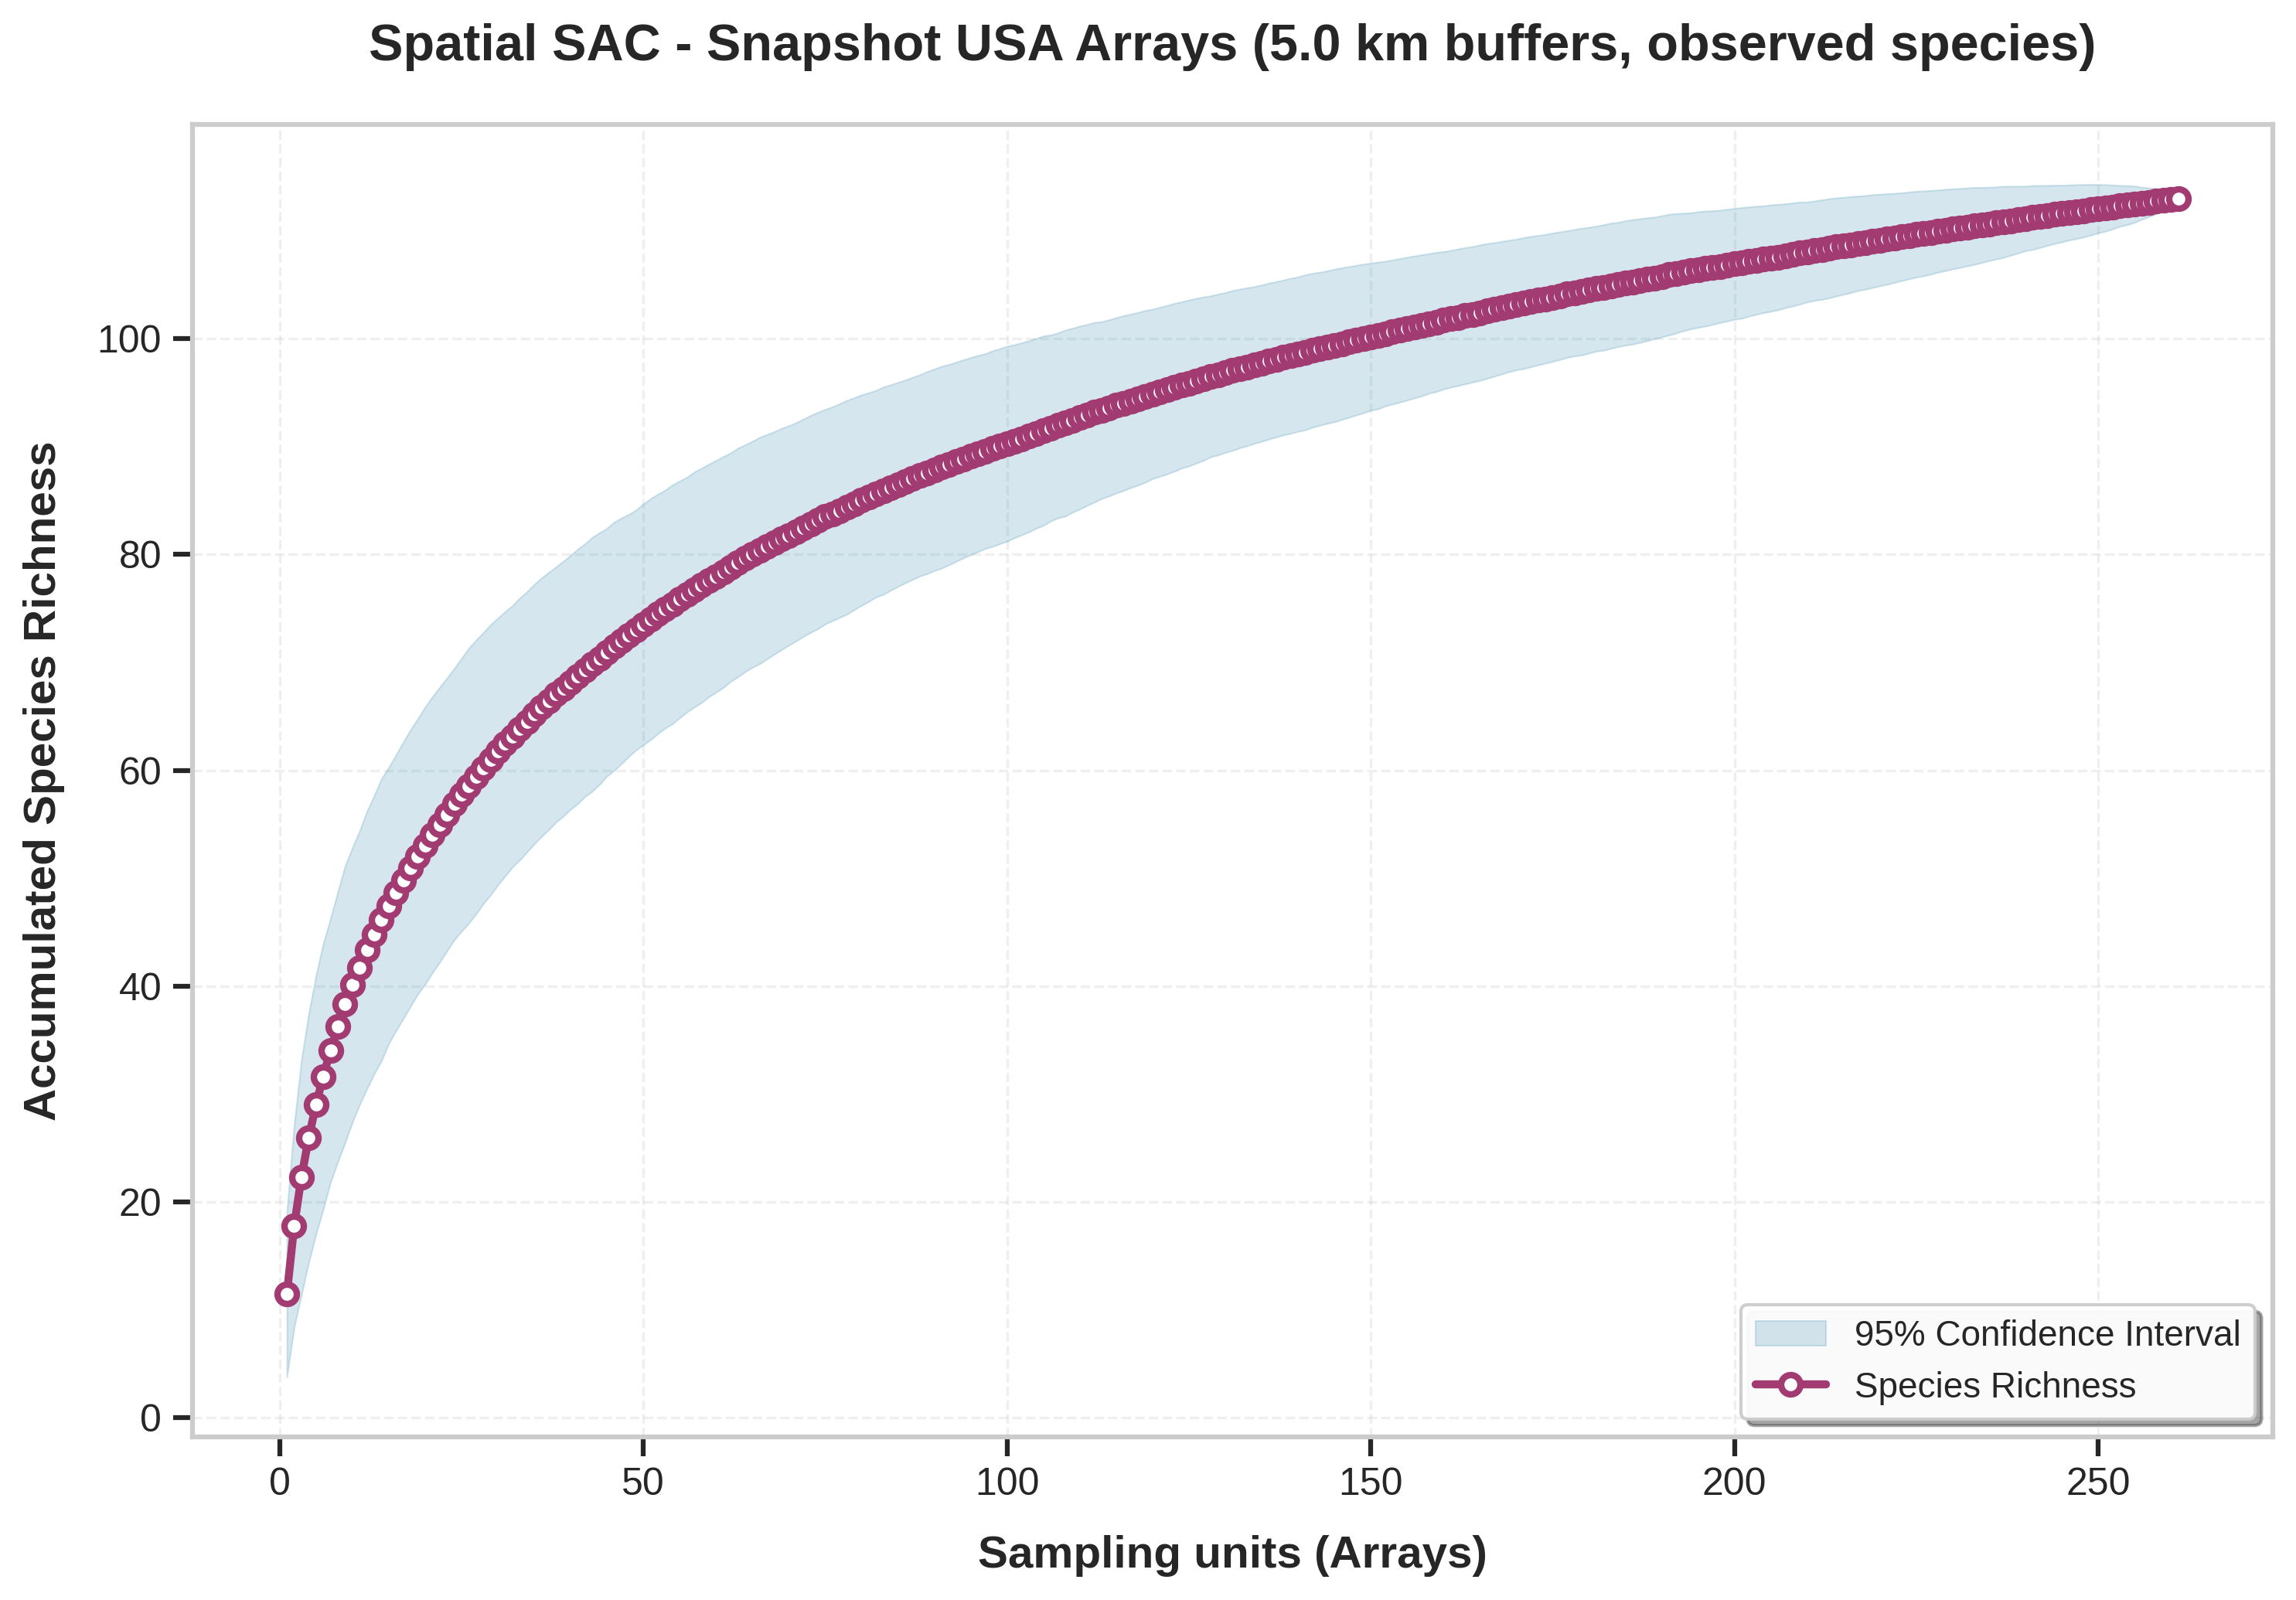

In [20]:
# ----------------------------
# SAC Scenario 1: Arrays as sampling units (observed species only)
# ----------------------------
acc_arrays = species_accumulation(array_species_observed, method="random", permutations=1000)
plot_sac(
    acc_arrays,
    title=f"Spatial SAC - Snapshot USA Arrays ({buffer_km} km buffers, observed species)",
    xlabel="Sampling units (Arrays)",
)

Array buffers: 261, IUCN polygons: 12703
Buffers bounds (m): [-16958410.41339935   2834498.16078025  -7636658.28965462
   8275383.47052454]
IUCN bounds (m): [-20037397.02329845  -7554328.68601035  20037397.02329845
  18428920.01295002]
Arrays with IUCN species predictions: 261
Unique IUCN-predicted species: 299


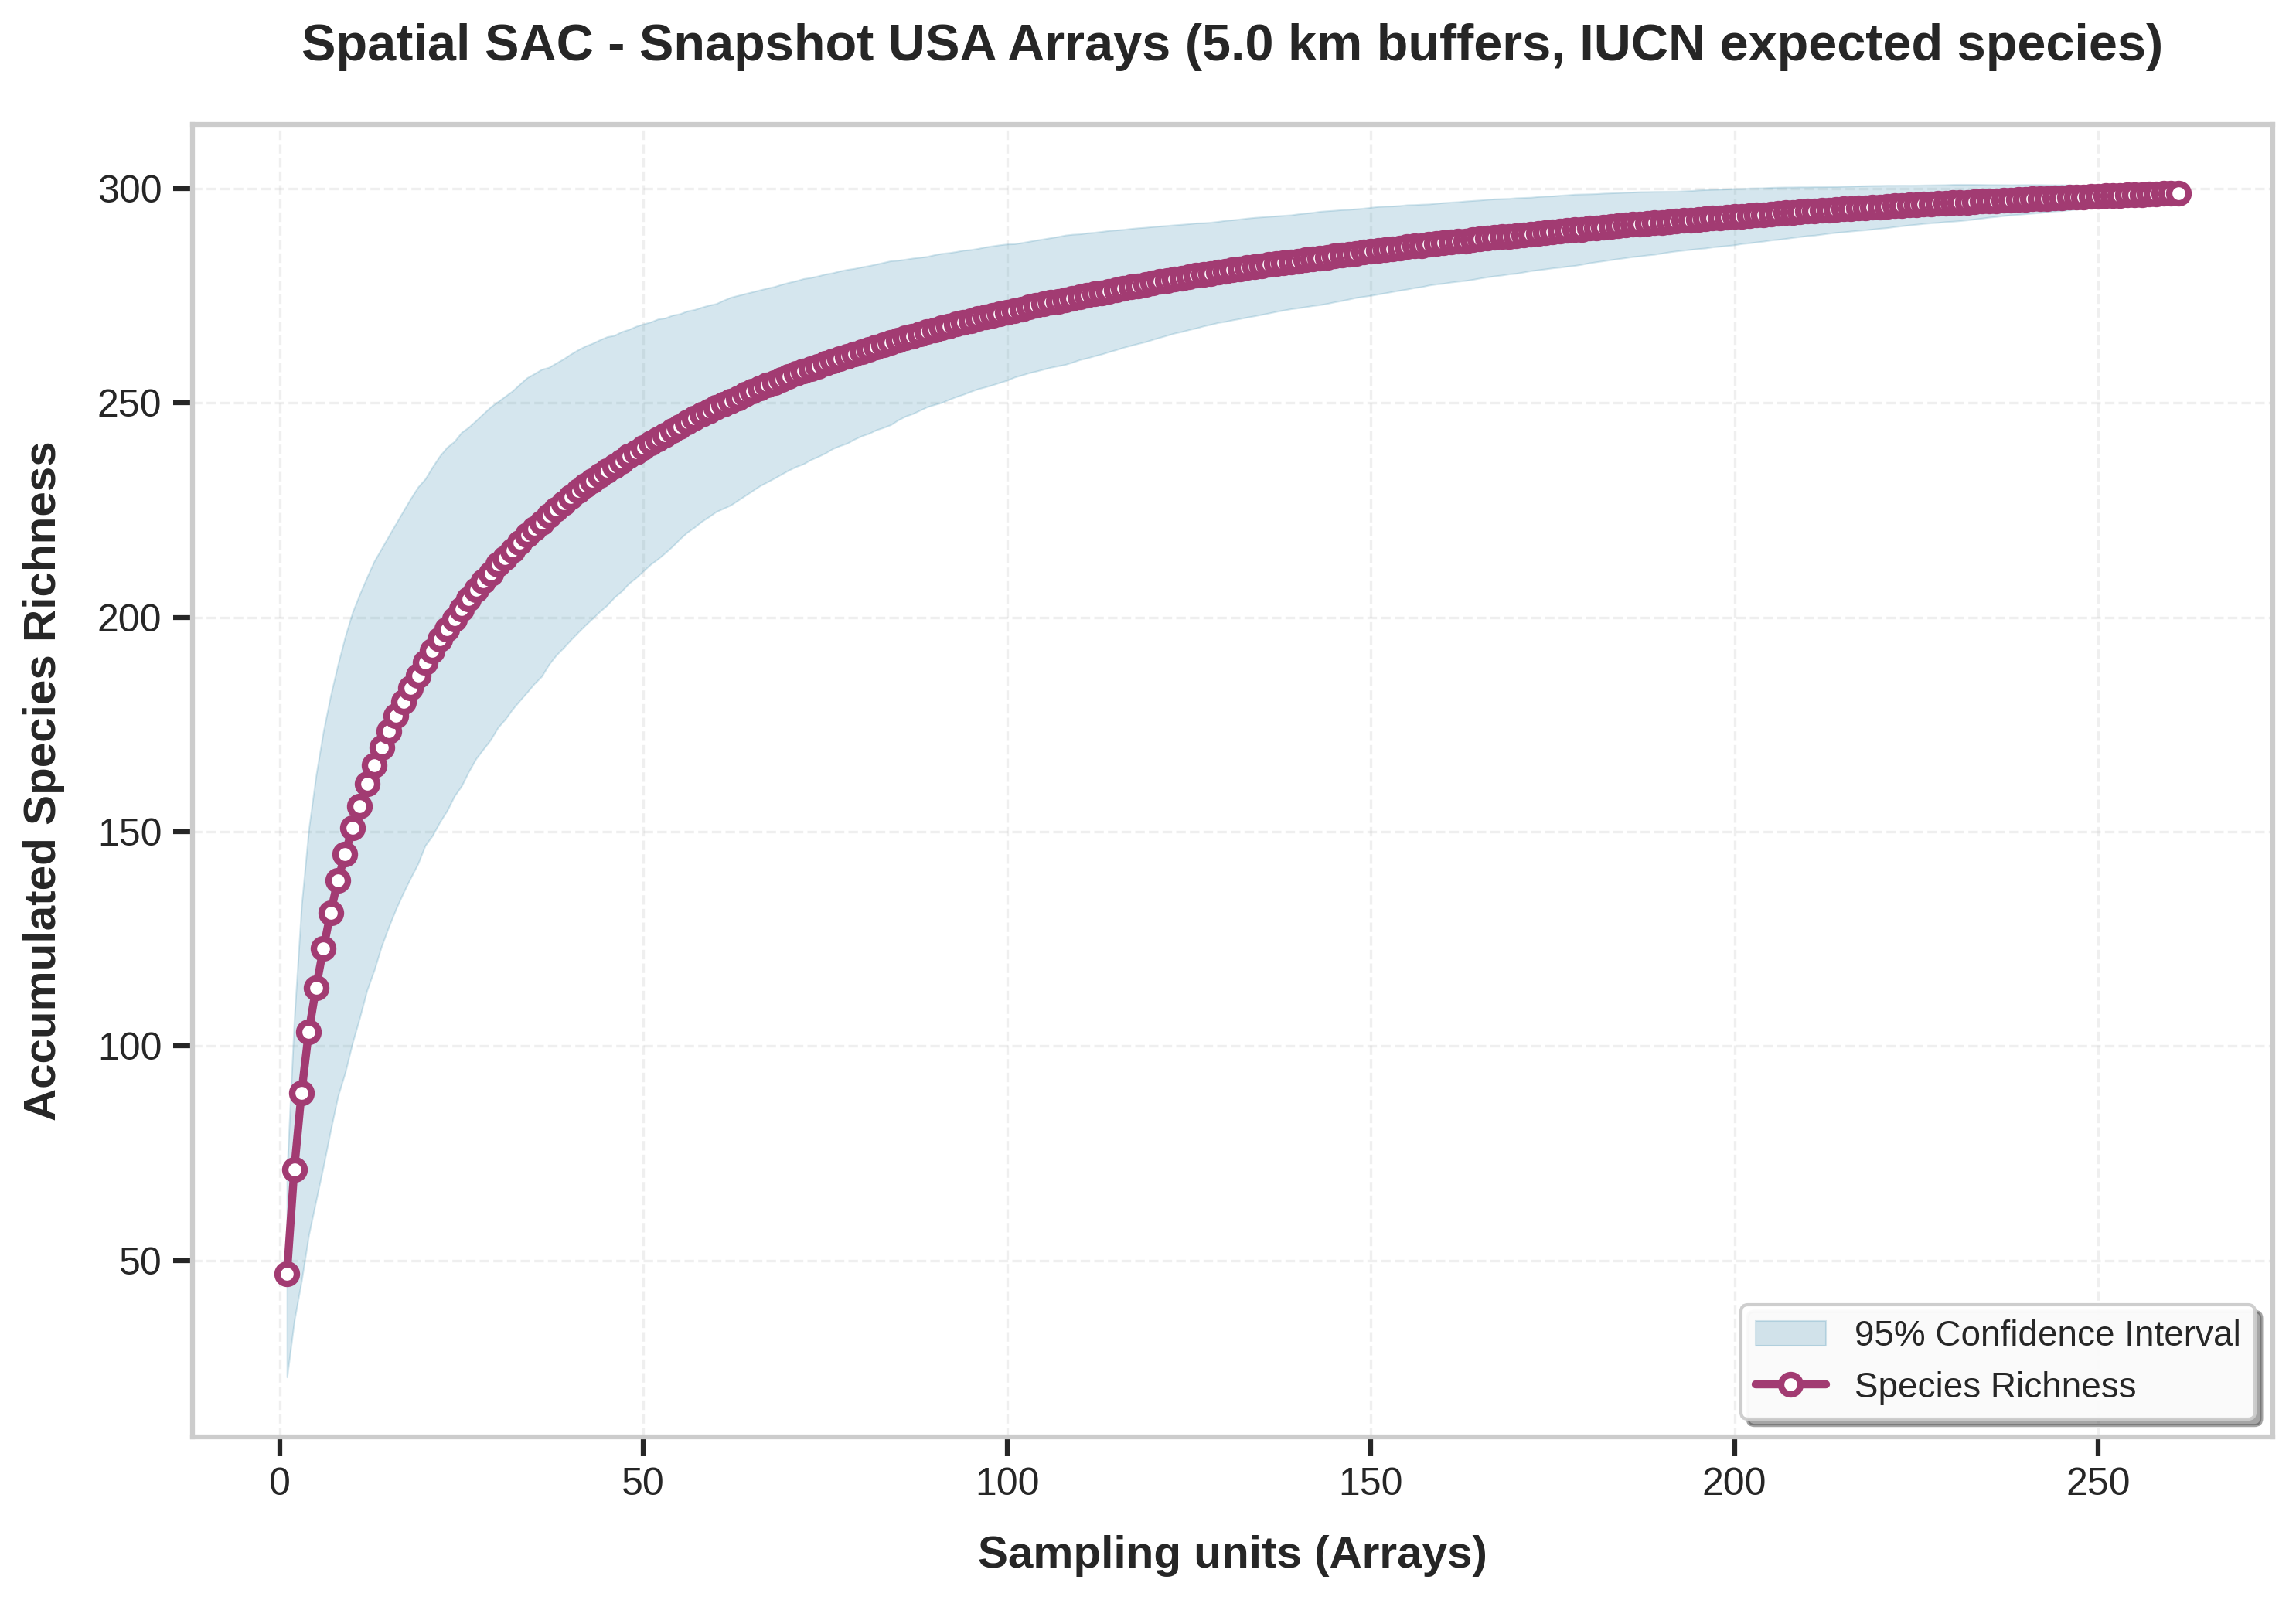

In [21]:
# ----------------------------
# SAC Scenario 2: IUCN-predicted species richness by array
# ----------------------------
# Reproject IUCN to meters for spatial join
iucn_m = iucn.to_crs(3857)
iucn_m = iucn_m[iucn_m.geometry.notnull() & ~iucn_m.geometry.is_empty].copy()

print(f"Array buffers: {len(gdf_buffers_m)}, IUCN polygons: {len(iucn_m)}")
print(f"Buffers bounds (m): {gdf_buffers_m.total_bounds}")
print(f"IUCN bounds (m): {iucn_m.total_bounds}")

# Spatial join: Find which IUCN species ranges intersect each array buffer
iucn_in_buffers = gpd.sjoin(iucn_m, gdf_buffers_m, how="inner", predicate="intersects")
if iucn_in_buffers.empty:
    raise ValueError("No IUCN polygons intersected the array buffers.")

# Reset index to avoid duplicate labels
iucn_in_buffers = iucn_in_buffers.reset_index(drop=True)

# Build presence/absence matrix (arrays x IUCN-predicted species)
array_species_iucn = pd.crosstab(iucn_in_buffers[array_col], iucn_in_buffers["Sci_Name"])
array_species_iucn = (array_species_iucn > 0).astype(int)

print(f"Arrays with IUCN species predictions: {array_species_iucn.shape[0]}")
print(f"Unique IUCN-predicted species: {array_species_iucn.shape[1]}")

# Calculate species accumulation for IUCN-predicted species
acc_arrays_iucn = species_accumulation(array_species_iucn, method="random", permutations=1000)
plot_sac(
    acc_arrays_iucn,
    title=f"Spatial SAC - Snapshot USA Arrays ({buffer_km} km buffers, IUCN expected species)",
    xlabel="Sampling units (Arrays)",
)


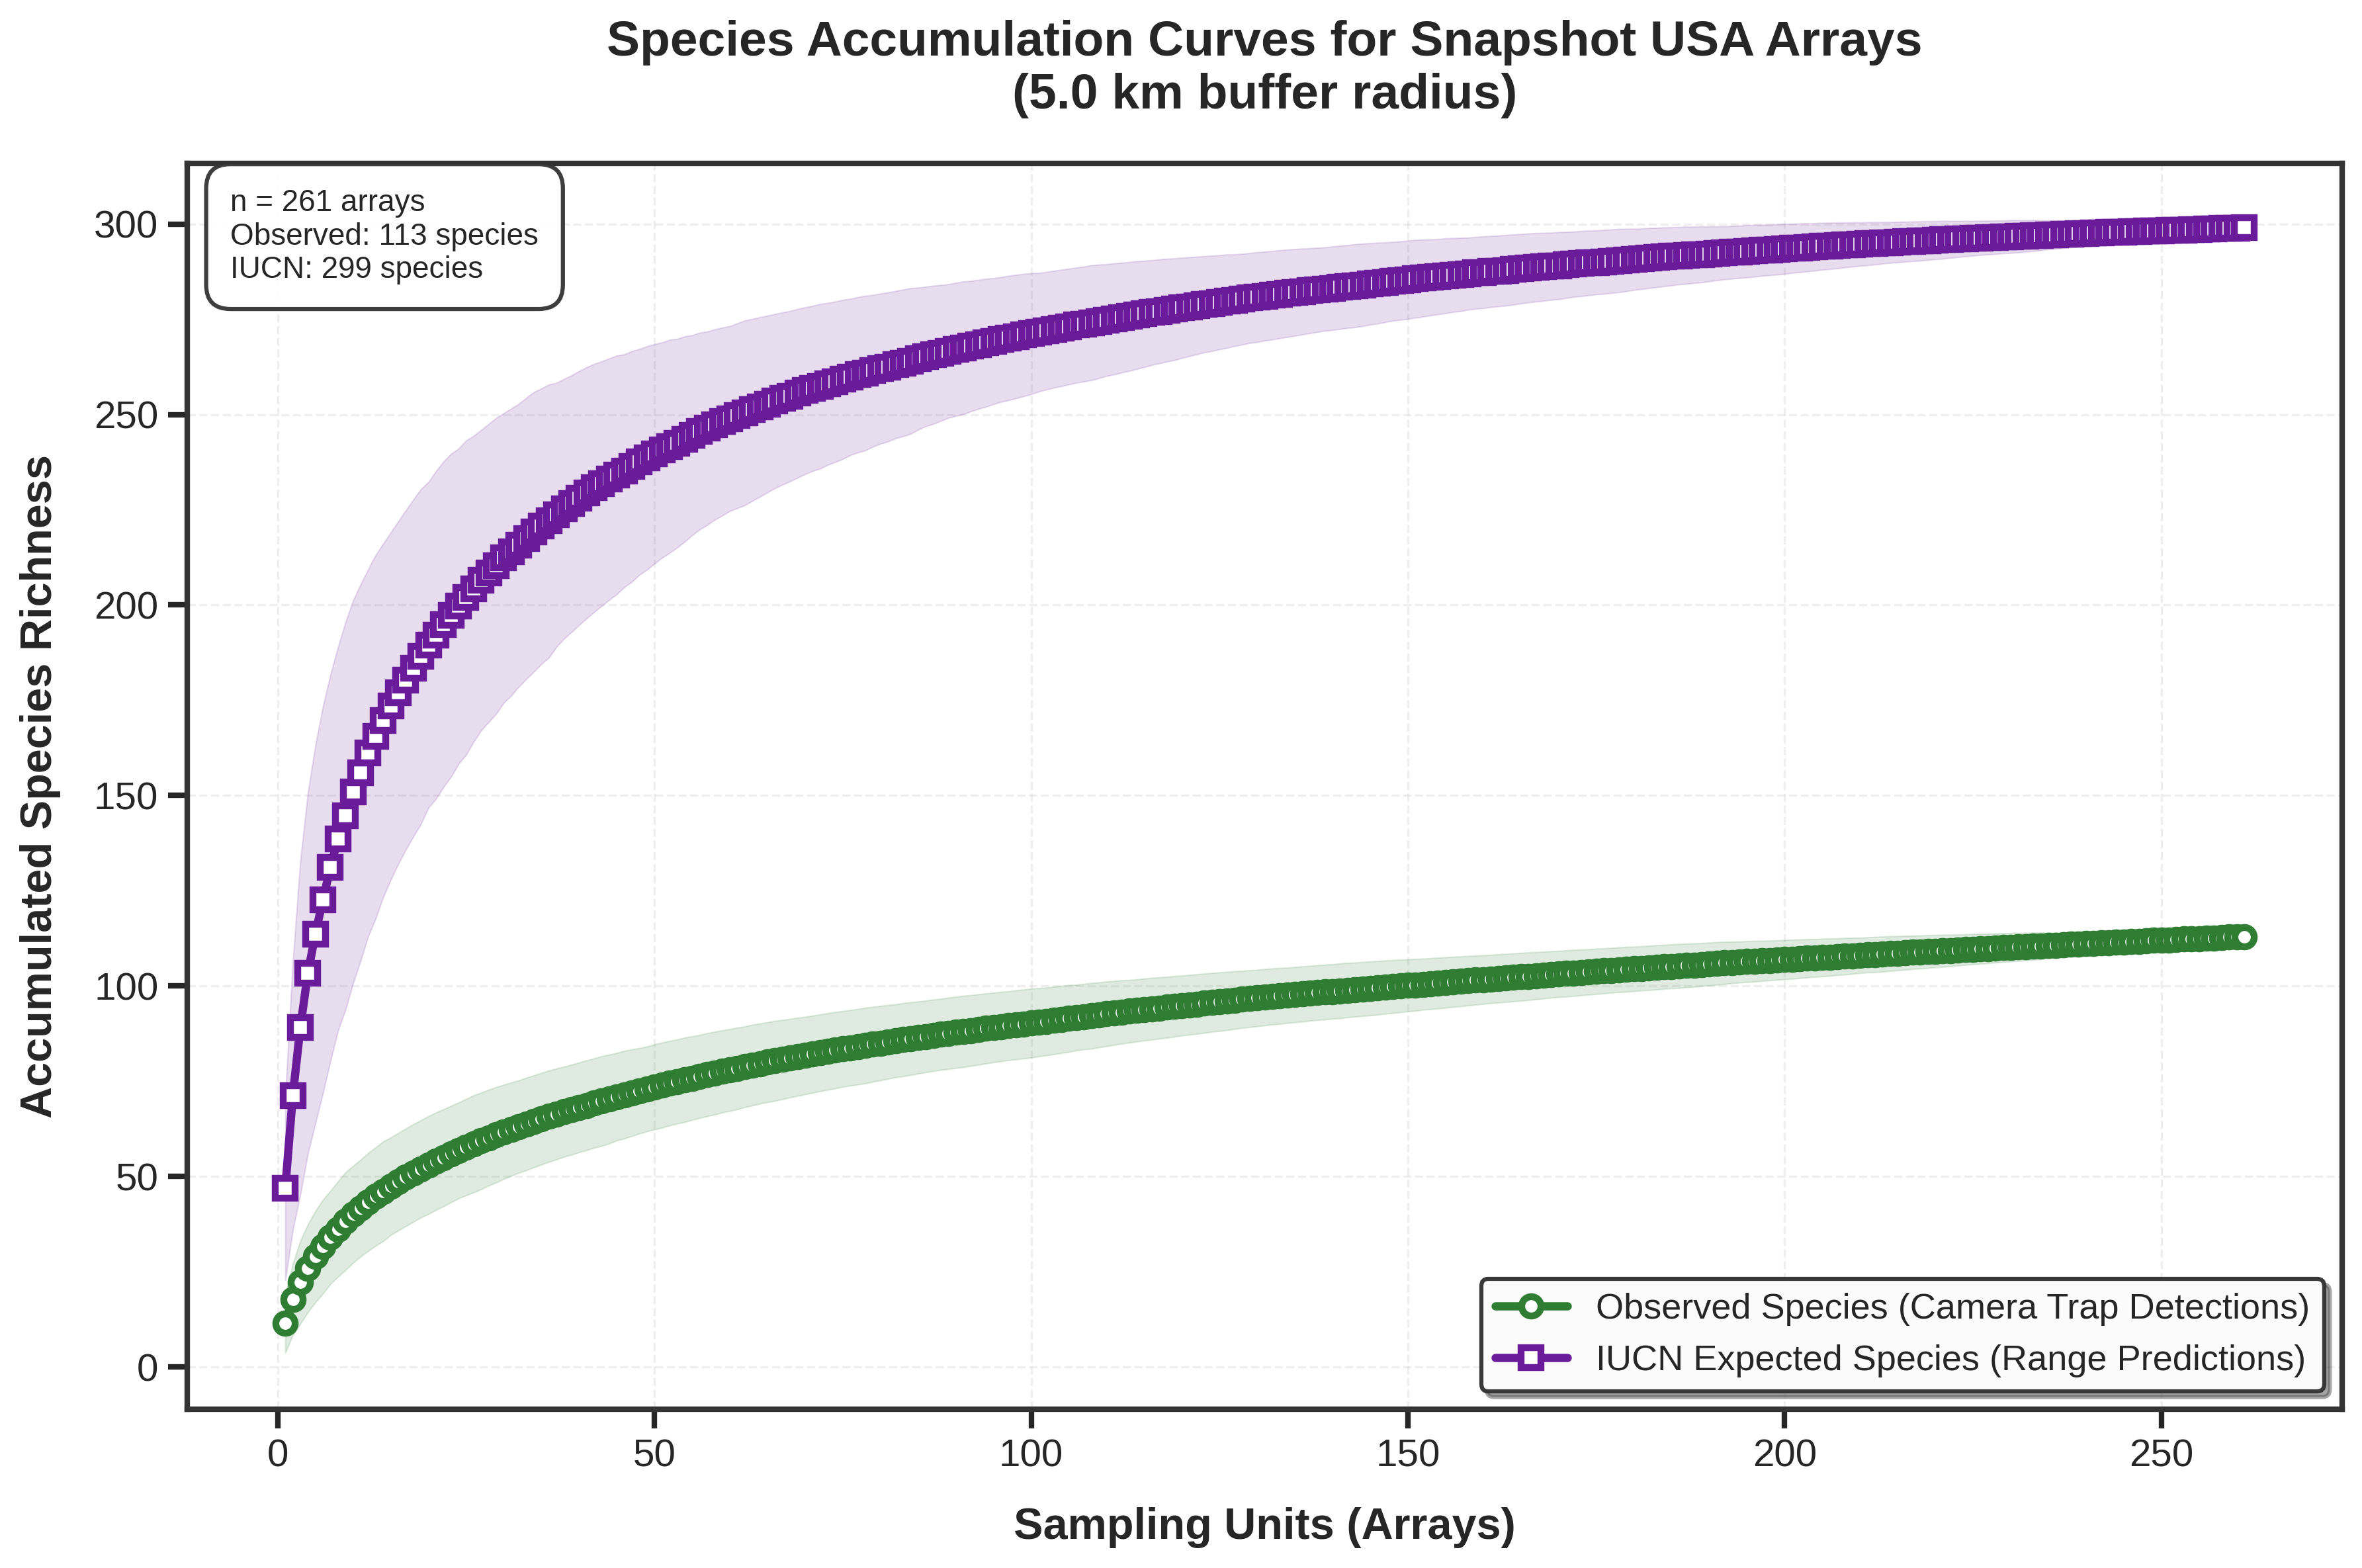


SUMMARY STATISTICS
Sampling units (arrays): 261
Buffer radius: 5.0 km

Observed Species (Camera Trap Detections):
  Total richness: 113
  Final SD: 0.00

IUCN Expected Species (Range Maps):
  Total richness: 299
  Final SD: 0.00

Detection Gap (IUCN - Observed): 186 species


In [22]:
# ----------------------------
# Combined SAC Plot: Observed vs IUCN-predicted Species
# ----------------------------
# Create publication-quality figure comparing detection-based vs range-based richness
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
plt.style.use('seaborn-v0_8-whitegrid')

# Scenario 1: Observed species from camera trap detections (green)
x1 = acc_arrays['sites']
y1 = acc_arrays['richness']
sd1 = acc_arrays['sd']

# Plot 95% confidence interval for observed species
if sd1 is not None and np.any(sd1 > 0):
    ax.fill_between(x1, y1 - 2*sd1, y1 + 2*sd1,
                    color='#2E7D32', alpha=0.15,
                    edgecolor='#2E7D32', linewidth=0.5)

# Plot mean accumulation curve for observed species
ax.plot(x1, y1, color='#2E7D32', linewidth=3,
        marker='o', markersize=7, markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#2E7D32',
        label='Observed Species (Camera Trap Detections)', zorder=3)

# Scenario 2: IUCN-predicted species from range maps (purple)
x2 = acc_arrays_iucn['sites']
y2 = acc_arrays_iucn['richness']
sd2 = acc_arrays_iucn['sd']

# Plot 95% confidence interval for IUCN predictions
if sd2 is not None and np.any(sd2 > 0):
    ax.fill_between(x2, y2 - 2*sd2, y2 + 2*sd2,
                    color='#6A1B9A', alpha=0.15,
                    edgecolor='#6A1B9A', linewidth=0.5)

# Plot mean accumulation curve for IUCN predictions
ax.plot(x2, y2, color='#6A1B9A', linewidth=3,
        marker='s', markersize=7, markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#6A1B9A',
        label='IUCN Expected Species (Range Predictions)', zorder=3)

# Configure grid
ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

# Axis labels and title
ax.set_xlabel('Sampling Units (Arrays)', fontsize=16, fontweight='bold', labelpad=12)
ax.set_ylabel('Accumulated Species Richness', fontsize=16, fontweight='bold', labelpad=12)
ax.set_title(f'Species Accumulation Curves for Snapshot USA Arrays\n({buffer_km} km buffer radius)',
            fontsize=18, fontweight='bold', pad=20)

# Format tick marks
ax.tick_params(axis='both', which='major', labelsize=14, length=7, width=2)

# Add legend
legend = ax.legend(loc='lower right', frameon=True, fancybox=True,
                   shadow=True, fontsize=13, framealpha=0.97,
                   edgecolor='#333333', facecolor='white')
legend.get_frame().set_linewidth(1.5)

# Format plot borders
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('#333333')

# Add sample size and richness annotation
textstr = f'n = {array_species_observed.shape[0]} arrays\nObserved: {array_species_observed.shape[1]} species\nIUCN: {array_species_iucn.shape[1]} species'
props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#333333', linewidth=1.5, alpha=0.95)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Sampling units (arrays): {array_species_observed.shape[0]}")
print(f"Buffer radius: {buffer_km} km")
print(f"\nObserved Species (Camera Trap Detections):")
print(f"  Total richness: {acc_arrays['richness'][-1]:.0f}")
print(f"  Final SD: {acc_arrays['sd'][-1]:.2f}")
print(f"\nIUCN Expected Species (Range Maps):")
print(f"  Total richness: {acc_arrays_iucn['richness'][-1]:.0f}")
print(f"  Final SD: {acc_arrays_iucn['sd'][-1]:.2f}")
print(f"\nDetection Gap (IUCN - Observed): {acc_arrays_iucn['richness'][-1] - acc_arrays['richness'][-1]:.0f} species")
print("="*60)
